In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santander-train.csv


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


In [6]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/santander-train.csv')

In [7]:
X = df_train.drop('TARGET',axis=1)
y= df_train['TARGET']

In [8]:
X.shape

(76020, 370)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [11]:
constant_filter.get_support().sum()

331

In [12]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [13]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
       'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3'],
      dtype='object')

In [14]:
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [15]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [16]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filter.get_support().sum()

271

In [18]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [19]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [20]:
type(x_train_T)

numpy.ndarray

In [21]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [22]:
x_train_T.shape

(271, 60816)

In [24]:
x_train_T.duplicated().sum()

16

In [27]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Length: 271, dtype: bool

In [28]:
features_to_keep = [not index for index in duplicated_features]

In [29]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [30]:
x_train_unique.shape , x_train.shape

((60816, 255), (60816, 370))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators =100,random_state = 0,n_jobs = -1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy:')
    print(accuracy_score(y_test,y_pred))

In [45]:
%%time
run_randomforest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy:
0.9567219152854513
CPU times: user 32.3 s, sys: 137 ms, total: 32.4 s
Wall time: 8.57 s


In [46]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy:
0.9573796369376479
CPU times: user 37.6 s, sys: 306 ms, total: 37.9 s
Wall time: 10 s


In [48]:
corrmat = x_train_unique.corr()

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

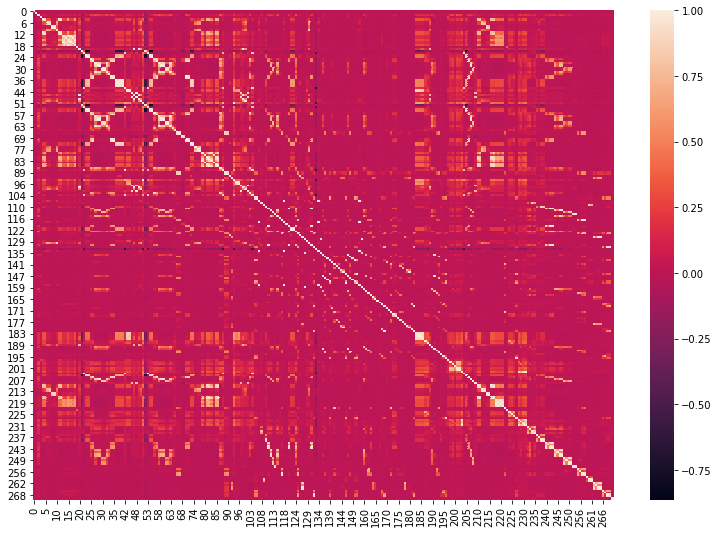

In [52]:
plt.figure(figsize = (13,9))
sns.heatmap(corrmat)

In [53]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
                
    return corr_col

In [54]:
corr_features = get_correlation(x_train_unique , 0.85)
corr_features

{5,
 9,
 11,
 12,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 44,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 67,
 69,
 70,
 71,
 72,
 74,
 78,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 94,
 96,
 98,
 99,
 100,
 101,
 103,
 104,
 106,
 118,
 120,
 122,
 126,
 130,
 131,
 134,
 135,
 147,
 148,
 149,
 150,
 157,
 158,
 159,
 180,
 182,
 183,
 184,
 185,
 186,
 191,
 202,
 204,
 205,
 206,
 207,
 210,
 211,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 227,
 228,
 230,
 231,
 235,
 238,
 239,
 240,
 242,
 243,
 244,
 246,
 247,
 250,
 251,
 252,
 254,
 257,
 258,
 261,
 262,
 264,
 265,
 268,
 269}

In [57]:
x_train_uncorr = x_train_unique.drop(labels = corr_features,axis=1)
x_test_uncorr = x_test_unique.drop(labels = corr_features,axis=1)

In [58]:
x_train_uncorrr.shape , x_test_uncorr.shape

((60816, 134), (15204, 134))

In [59]:
%%time
run_randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy:
0.9567219152854513
CPU times: user 23.4 s, sys: 88 ms, total: 23.5 s
Wall time: 6.24 s


In [60]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy:
0.9573796369376479
CPU times: user 37 s, sys: 294 ms, total: 37.3 s
Wall time: 9.9 s


In [61]:
# feature Selection based on Mutual Information

In [62]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif , mutual_info_regression
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [63]:
mi = mutual_info_classif(x_train_unique,y_train)

In [64]:
len(mi)

255

In [66]:
mi = pd.Series(mi)
mi.index = x_train_unique.columns

In [67]:
mi.sort_values(ascending = False , inplace = True)

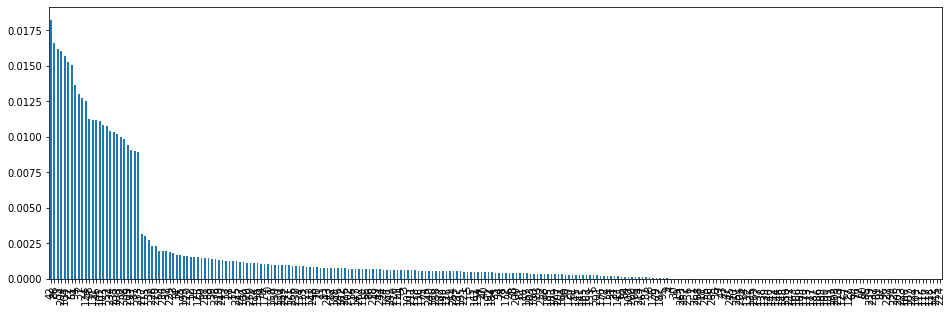

In [68]:
mi.plot.bar(figsize = (16,5))

In [69]:
sel = SelectPercentile(mutual_info_classif , percentile =10).fit(x_train_unique,y_train)
x_train_unique.columns[sel.get_support()]

Int64Index([  2,  21,  22,  42,  46,  48,  51,  52,  53,  87,  88,  94,  98,
            101, 103, 104, 108, 124, 131, 133, 204, 209, 232, 233, 234, 235],
           dtype='int64')

In [70]:
len(x_train_unique.columns[sel.get_support()])

26

In [71]:
x_train_mi  = sel.transform(x_train_unique)
x_test_mi = sel.transform(x_test_unique)

In [72]:
x_train_mi.shape

(60816, 26)

In [73]:
%%time
run_randomforest(x_train_mi,x_test_mi,y_train,y_test)


Accuracy:
0.9571165482767693
CPU times: user 13.3 s, sys: 64.5 ms, total: 13.4 s
Wall time: 3.7 s


In [74]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy:
0.9573796369376479
CPU times: user 36.6 s, sys: 136 ms, total: 36.8 s
Wall time: 9.62 s


In [75]:
# mutual Information Gain in Regression

In [77]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [78]:
boston = load_boston()

In [79]:
X = pd.DataFrame(data = boston.data,columns= boston.feature_names)

In [80]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
y = boston.target

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2)

In [83]:
mi = mutual_info_regression(X_train,Y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending = False, inplace = True)

In [84]:
mi

LSTAT      0.713414
RM         0.545875
INDUS      0.517380
PTRATIO    0.457920
NOX        0.453098
AGE        0.356485
TAX        0.355834
DIS        0.347082
CRIM       0.344757
ZN         0.183857
RAD        0.183566
B          0.181578
CHAS       0.011022
dtype: float64

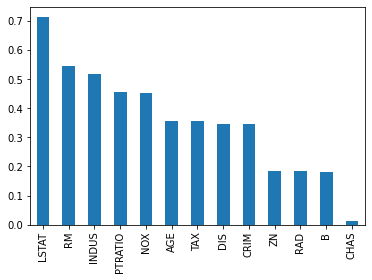

In [85]:
mi.plot.bar()

In [86]:
sel  = SelectKBest(mutual_info_regression , k=9).fit(X_train,Y_train)
X_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [87]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_predict = model.predict(X_test)

In [89]:
r2_score(Y_test,y_predict)

0.704872929699004

In [90]:
np.sqrt(mean_squared_error(Y_test,y_predict))

4.630219481567858

In [91]:
np.std(y)

9.188011545278203

In [92]:
x_train_9 = sel.transform(X_train)
x_train_9.shape

(404, 9)

In [93]:
x_test_9 = sel.transform(X_test)

In [94]:
model = LinearRegression()
model.fit(x_train_9,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_predict = model.predict(x_test_9)

In [100]:
r2_score(Y_test,y_pred)

0.7030518114948257

In [ ]:
np.sqrt(mean_squared_error(Y_test,y_predict))